In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

In [3]:
os.chdir("..")

In [4]:
##carga de datos 
df_transito= pd.read_csv("./data/Hechos_transito_concat.csv")


/tmp/ipykernel_69400/2090865383.py:2: DtypeWarning: Columns (5,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transito= pd.read_csv("./data/Hechos_transito_concat.csv")


In [5]:
cols=["identidad","condicion","lesiones"]
for i in cols:
    df_transito[i].astype(str)

In [6]:
df_transito

,fecha_evento,ano_evento,mes,dia,hora2,condicion,tipo_de_evento,colonia,alcaldia,tipo_de_interseccion,tipo_de_vehiculo_1,tipo_de_vehiculo_2,lesiones,edad_lesionado,identidad,unidad_medica_de_apoyo,total_lesionados,total_occisos
0,2019-01-01,2019,enero,martes,10.0,LESIONADO,ATROPELLADO,STA URSULA COAPA,COYOACAN,T,AUTOMOVIL,NaN,LUMBALGIA POSTURAL,9,PEATON,ERUM,1,0
1,2019-01-01,2019,enero,martes,7.0,LESIONADO,CHOQUE,VALLEJO,GUSTAVO A MADERO,Y,AUTOMOVIL,AUTOMOVIL,POLICONTUNDIDO POLICONTUNDIDO,39 25,CONDUCTOR,ERUM,2,0
2,2019-01-01,2019,enero,martes,9.0,LESIONADO,CHOQUE,AGRICOLA PANTITLAN,IZTACALCO,CRUZ,MICROBUS,OBJETO FIJO,POLICONTUNDIDO,43,CONDUCTOR,CRUZ ROJA,1,0
3,2019-01-01,2019,enero,martes,11.0,LESIONADO,CHOQUE,TEPEYAC,GUSTAVO A MADERO,T,AUTOMOVIL,OBJETO FIJO,POLICONTUNDIDO,SD,CONDUCTOR,CRUZ ROJA,1,0
4,2019-01-01,2019,enero,martes,19.0,LESIONADO,CHOQUE,LOMAS DE ZARAGOZA,IZTAPALAPA,RECTA,AUTOMOVIL,AUTOMOVIL,CRISIS NERVIOSA,28,CONDUCTOR,ERUM,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103592,2022-12-31,2022,diciembre,sabado,18.0,NaN,DERRAPADO,CITLALLI,IZTAPALAPA,T,MOTOCICLETA,NaN,NaN,25,NaN,ERUM,1,0
103593,2022-12-31,2022,diciembre,sabado,18.0,NaN,DERRAPADO,ROMERO DE TERREROS,COYOACAN,CRUZ,MOTOCICLETA,NaN,NaN,43,NaN,CRUZ ROJA,1,0
103594,2022-12-31,2022,diciembre,sabado,20.0,NaN,DERRAPADO,PARAJE SAN JUAN JOYA,IZTAPALAPA,T,MOTOCICLETA,NaN,NaN,NaN,NaN,CCO/PC,0,1
103595,2022-12-31,2022,diciembre,sabado,21.0,NaN,DERRAPADO,NATIVITAS,BENITO JUAREZ,CRUZ,MOTOCICLETA,NaN,NaN,30,NaN,PC,1,0


## Preparando los datos para el mapa 

#### 1 primero cargamamos los poligonos de las alcaldías de la ciudad de México

In [7]:
alcaldias= "./data/limite-de-las-alcaldas.json"
map_data = gpd.read_file(alcaldias)
map_data.head(16)
map_data.head(16)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356..."
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.56150, -99.11485 19.557..."
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406..."
5,09007,09,007,Iztapalapa,"POLYGON ((-99.01692 19.38187, -99.01652 19.381..."
6,09008,09,008,La Magdalena Contreras,"POLYGON ((-99.20819 19.33674, -99.20859 19.336..."
7,09009,09,009,Milpa Alta,"POLYGON ((-98.99718 19.22747, -98.99723 19.227..."
8,09010,09,010,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
9,09011,09,011,Tláhuac,"POLYGON ((-98.97881 19.32392, -98.97856 19.323..."


In [8]:
##hacemos una lista de las colonias para homologar los nombres en las alcaldias en mabas dataDrames para depues hacer el merge 
col=list(map_data.NOMGEO.unique())  
list2=list(df_transito.alcaldia.unique())
print(list2)
print(col)

['COYOACAN', 'GUSTAVO A MADERO', 'IZTACALCO', 'IZTAPALAPA', 'AZCAPOTZALCO', 'VENUSTIANO CARRANZA', 'MIGUEL HIDALGO', 'ALVARO OBREGON', 'CUAUHTEMOC', 'TLALPAN', 'BENITO JUAREZ', 'MAGDALENA CONTRERAS', 'CUAJIMALPA', 'TLAHUAC', 'XOCHIMILCO', 'MILPA ALTA']
['Azcapotzalco', 'Coyoacán', 'Cuajimalpa de Morelos', 'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras', 'Milpa Alta', 'Álvaro Obregón', 'Tláhuac', 'Tlalpan', 'Xochimilco', 'Benito Juárez', 'Cuauhtémoc', 'Miguel Hidalgo', 'Venustiano Carranza']


In [9]:
##remplazamos los valores para que hagan match con los valores del mapa 
df_var_rep=df_transito.replace(to_replace= ['ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN', 'CUAJIMALPA', 'CUAUHTEMOC', 'GUSTAVO A MADERO', 'IZTACALCO', 'IZTAPALAPA', 'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA', 'TLAHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA', 'XOCHIMILCO'],
                    value=['Álvaro Obregón','Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa de Morelos', 'Cuauhtémoc', 'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras', 'Miguel Hidalgo', 'Milpa Alta','Tláhuac', 'Tlalpan', 'Venustiano Carranza', 'Xochimilco'])

### En este caso solo nos interesan los altercados relacionados con  bicicleta, asi que filtraremos 

In [10]:
acci_bici=df_var_rep[(df_var_rep['tipo_de_vehiculo_1'] == "BICICLETA") | (df_var_rep['tipo_de_vehiculo_2'] == "BICICLETA")]

In [11]:
acci_bici

,fecha_evento,ano_evento,mes,dia,hora2,condicion,tipo_de_evento,colonia,alcaldia,tipo_de_interseccion,tipo_de_vehiculo_1,tipo_de_vehiculo_2,lesiones,edad_lesionado,identidad,unidad_medica_de_apoyo,total_lesionados,total_occisos
55,2019-01-07,2019,enero,lunes,18.0,LESIONADO,CHOQUE,DEL VALLE CENTRO,Benito Juárez,CRUZ,BICICLETA,SD,CX FRONTAL 3 CM,21,CICLISTA,ERUM,1,0
71,2019-01-10,2019,enero,jueves,7.0,OCCISO,CHOQUE,GRANJAS NAVIDAD,Cuajimalpa de Morelos,T,BICICLETA,CAMION DE CARGA,DECESO POR TCE,NaN,CICLISTA,CCO/CRUZ ROJA,0,1
84,2019-01-11,2019,enero,viernes,14.0,LESIONADO,CHOQUE,MERCED BALBUENA,Venustiano Carranza,T,BICICLETA,AUTOMOVIL,LUXACION HOMBRO DER,19,CICLISTA,ERUM,1,0
85,2019-01-11,2019,enero,viernes,20.0,LESIONADO,CHOQUE,JALALPA TEPITO,Álvaro Obregón,T,AUTOMOVIL,BICICLETA,POLICONTUNDIDO POLICONTUNDIDO POLICONTUNDIDO,16 13 3,CICLISTA,CRUZ ROJA,3,0
94,2019-01-12,2019,enero,sabado,20.0,LESIONADO,CAIDA DE CICLISTA,ANAHUAC 1A SECC,Miguel Hidalgo,CRUZ,BICICLETA,NaN,POLICONTUNDIDO,SD,CICLISTA,CRUZ ROJA,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103497,2022-12-30,2022,diciembre,viernes,14.0,NaN,CHOQUE,DOCTORES,Cuauhtémoc,RAMAS MULTIPLES,BICICLETA,CAMION DE CARGA,NaN,19,NaN,PC,1,0
103500,2022-12-30,2022,diciembre,viernes,15.0,NaN,CHOQUE,GUADALUPE INN,Álvaro Obregón,RECTA,BICICLETA,MOTOCICLETA,NaN,47,NaN,MOTO ERUM,1,0
103503,2022-12-30,2022,diciembre,viernes,16.0,NaN,CHOQUE,SAN GREGORIO ATLAPULCO,Xochimilco,T,BICICLETA,BICICLETA,NaN,50,NaN,ERUM,1,0
103549,2022-12-31,2022,diciembre,sabado,11.0,NaN,CHOQUE,DEL VALLE NTE,Benito Juárez,Y,BICICLETA,AUTOMOVIL,NaN,54,NaN,SAMU,1,0


In [12]:
acci_bici_alc=acci_bici[["alcaldia","tipo_de_evento"]].groupby(["alcaldia"]).count().sort_values(by="tipo_de_evento").reset_index()
acci_bici_alc

,alcaldia,tipo_de_evento
0,Milpa Alta,44
1,La Magdalena Contreras,49
2,Cuajimalpa de Morelos,50
3,Álvaro Obregón,208
4,Tlalpan,224
5,Tláhuac,246
6,Xochimilco,281
7,Iztacalco,368
8,Azcapotzalco,417
9,Venustiano Carranza,448


In [13]:
acci_bici_alc.rename(columns={ 'alcaldia': 'NOMGEO'}, inplace= True)


In [14]:
acci_bici_alc

,NOMGEO,tipo_de_evento
0,Milpa Alta,44
1,La Magdalena Contreras,49
2,Cuajimalpa de Morelos,50
3,Álvaro Obregón,208
4,Tlalpan,224
5,Tláhuac,246
6,Xochimilco,281
7,Iztacalco,368
8,Azcapotzalco,417
9,Venustiano Carranza,448


In [15]:
df_map  = map_data.merge(acci_bici_alc, on='NOMGEO', how='left')
gdf = gpd.GeoDataFrame(df_map)

In [16]:
gdf.head(16)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,tipo_de_evento
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",417
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",550
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",50
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.56150, -99.11485 19.557...",684
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",368
5,09007,09,007,Iztapalapa,"POLYGON ((-99.01692 19.38187, -99.01652 19.381...",927
6,09008,09,008,La Magdalena Contreras,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",49
7,09009,09,009,Milpa Alta,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",44
8,09010,09,010,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",208
9,09011,09,011,Tláhuac,"POLYGON ((-98.97881 19.32392, -98.97856 19.323...",246


<Axes: title={'center': 'Numero de Accidentes relacionados con ciclistas por alcaldía CDMX'}, xlabel='Longitud', ylabel='Latitud'>

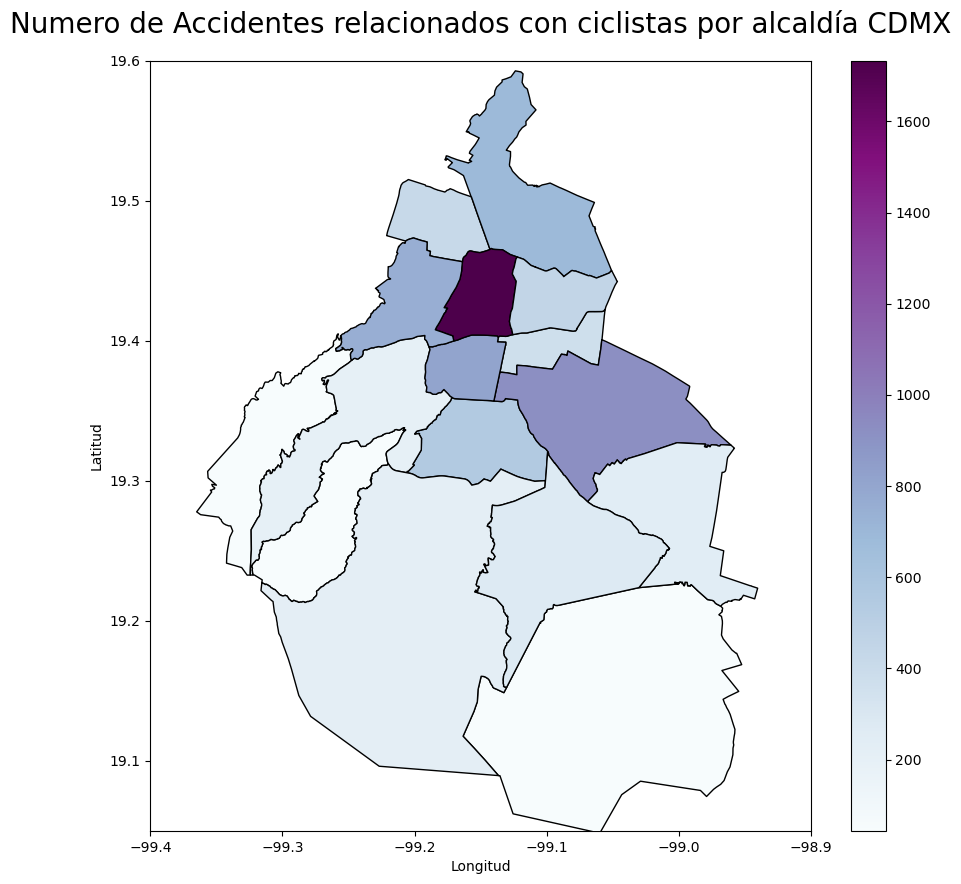

In [17]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-99.4, -98.9, 19.05, 19.6])
 
# Control del título y los ejes
ax.set_title('Numero de Accidentes relacionados con ciclistas por alcaldía CDMX', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': 'black'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
gdf.plot(column='tipo_de_evento', cmap='BuPu', ax=ax,
              legend=True, cax=cax, zorder=5,  edgecolor='black')

In [18]:
gdf_swk= gdf.copy()

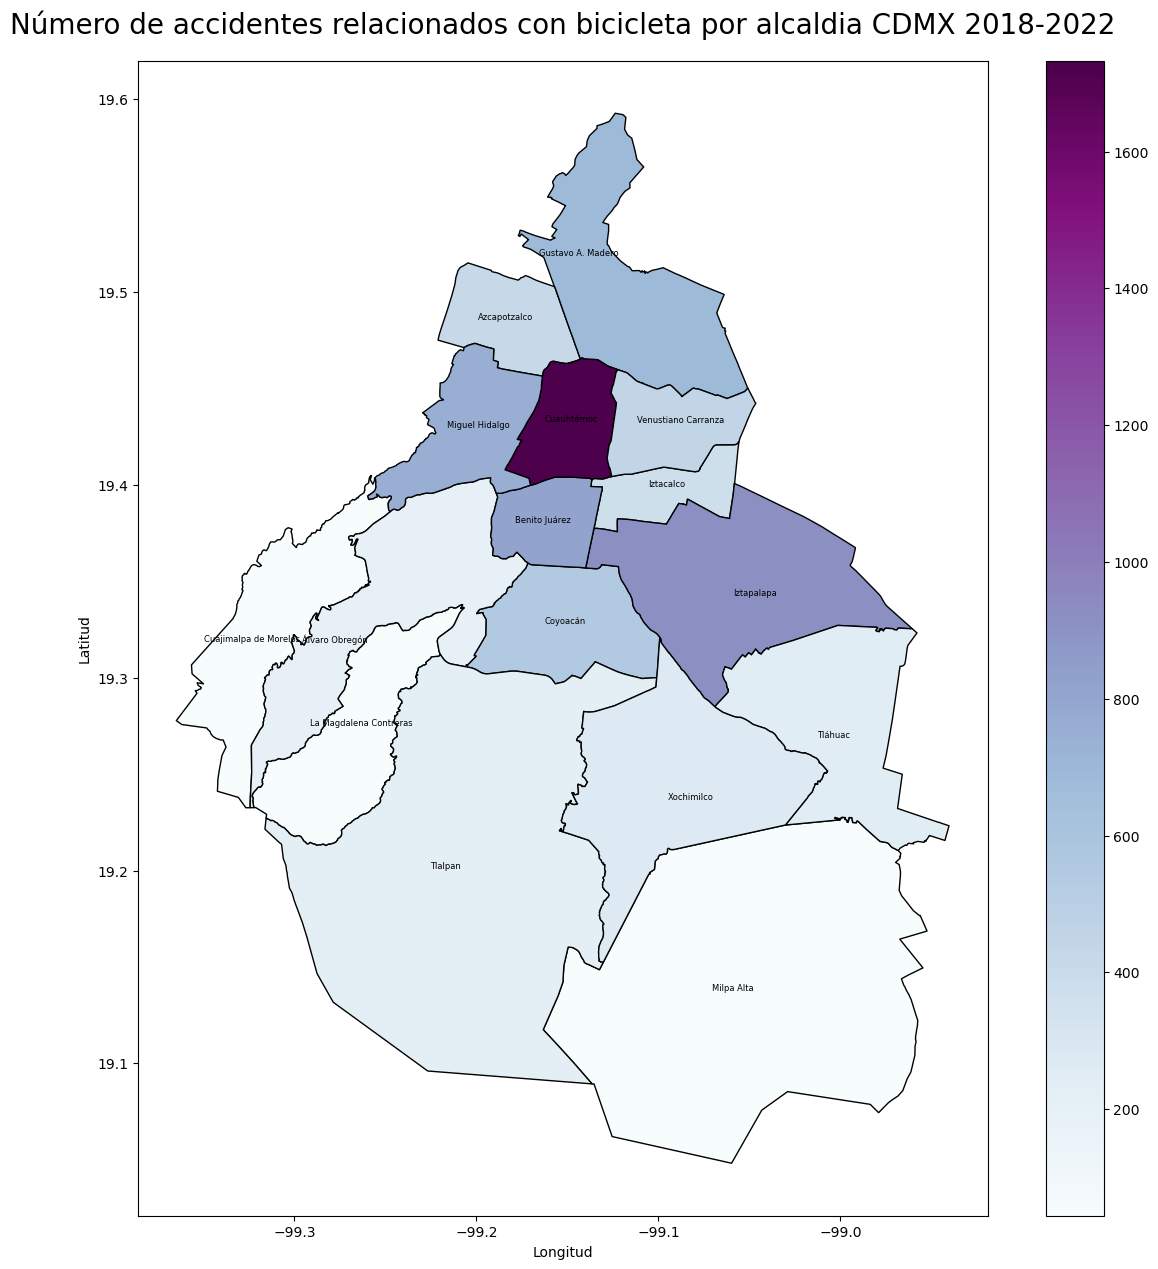

In [19]:
gdf_swk['coords'] = gdf_swk['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf_swk['coords'] = [coords[0] for coords in gdf_swk['coords']]
fig, ax = plt.subplots(figsize = (15,15))
ax.set_title('Número de accidentes relacionados con bicicleta por alcaldia CDMX 2018-2022', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': 'black'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
gdf_swk.plot(column="tipo_de_evento", cmap='BuPu', ax=ax,
              edgecolor='black',legend=True)
for idx, row in gdf_swk.iterrows():plt.annotate(text=row['NOMGEO'], xy=row['coords'], horizontalalignment='center', color='black',size=6)


## ahora agregaremos los puntos que representan las estaciones de las ecobicis al mapa

In [20]:
## data frame con los puntos de las estaciones de ecobici
ecobicis=pd.read_csv("./data/ecobicis.csv")
ecobicis=ecobicis[["latitud","longitud","sitio_de_e"]]

In [21]:
ecobicis

,latitud,longitud,sitio_de_e
0,19.362041,-99.175158,Arroyo
1,19.354803,-99.175419,Arroyo
2,19.361489,-99.177432,Arroyo
3,19.358903,-99.177997,Arroyo
4,19.358863,-99.182930,Arroyo
...,...,...,...
680,19.413235,-99.143476,Arroyo
681,19.415713,-99.141227,Arroyo
682,19.417133,-99.145649,Arroyo
683,19.420029,-99.140999,Arroyo


In [22]:
##los transformamos en objetos de geopandas
ecobici_gdf = gpd.GeoDataFrame(
    ecobicis, geometry=gpd.points_from_xy(ecobicis.longitud, ecobicis.latitud), crs="EPSG:4326"
)

In [23]:
ecobici_gdf

,latitud,longitud,sitio_de_e,geometry
0,19.362041,-99.175158,Arroyo,POINT (-99.17516 19.36204)
1,19.354803,-99.175419,Arroyo,POINT (-99.17542 19.35480)
2,19.361489,-99.177432,Arroyo,POINT (-99.17743 19.36149)
3,19.358903,-99.177997,Arroyo,POINT (-99.17800 19.35890)
4,19.358863,-99.182930,Arroyo,POINT (-99.18293 19.35886)
...,...,...,...,...
680,19.413235,-99.143476,Arroyo,POINT (-99.14348 19.41324)
681,19.415713,-99.141227,Arroyo,POINT (-99.14123 19.41571)
682,19.417133,-99.145649,Arroyo,POINT (-99.14565 19.41713)
683,19.420029,-99.140999,Arroyo,POINT (-99.14100 19.42003)


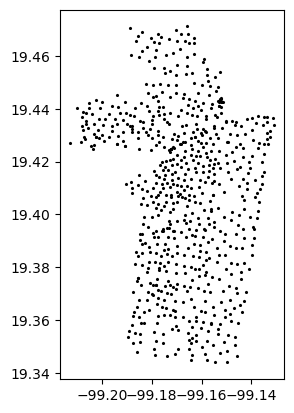

In [24]:
##chacmos que el formato sea similar al mapa antes hecho
ecobici_gdf.plot(marker='*', color='black', markersize=2)
ecobici_gdf = ecobici_gdf.to_crs(gdf_swk.crs)

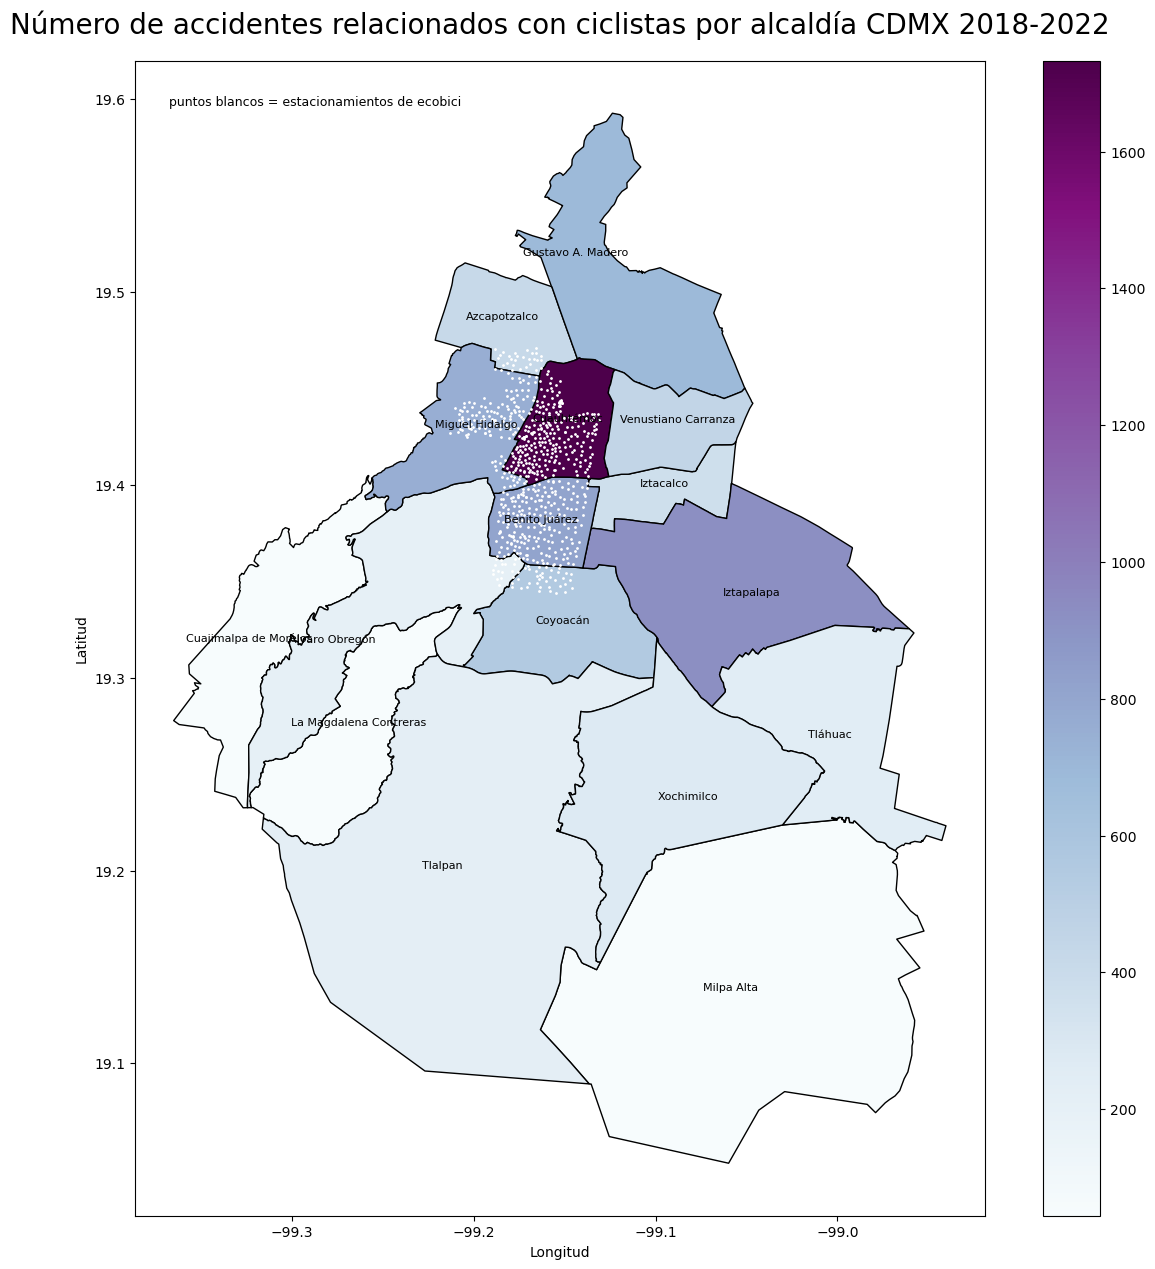

In [25]:
###ahora graficamos y añadimos los puntos
gdf_swk['coords'] = gdf_swk['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf_swk['coords'] = [coords[0] for coords in gdf_swk['coords']]
fig, ax = plt.subplots(figsize = (15,15))
fig.text(.3, .85, "puntos blancos = estacionamientos de ecobici ", ha='center', fontdict={'fontsize':9, 'color': 'black'})
ax.set_title('Número de accidentes relacionados con ciclistas por alcaldía CDMX 2018-2022', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': 'black'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
lol=gdf_swk.plot(column="tipo_de_evento", cmap='BuPu', ax=ax,
              edgecolor='black',legend=True)
for idx, row in gdf_swk.iterrows():plt.annotate(text=row['NOMGEO'], xy=row['coords'], horizontalalignment='center', color='black',size=8)
ecobici_gdf.plot(ax=lol, marker='o', color='white', markersize=1)

plt.show()

Como vemos el mayor número de accidentes se encuntra en la colonia Chuahutemoc, alcaldía con el mayor número de estacionamientos de ecobicis. Sin embargo,  Iztapalapa es la segunda alcaldía con mayor número de accidentes a  pesar de que en esa alcaldia no hay estacionamientos de ecobici 

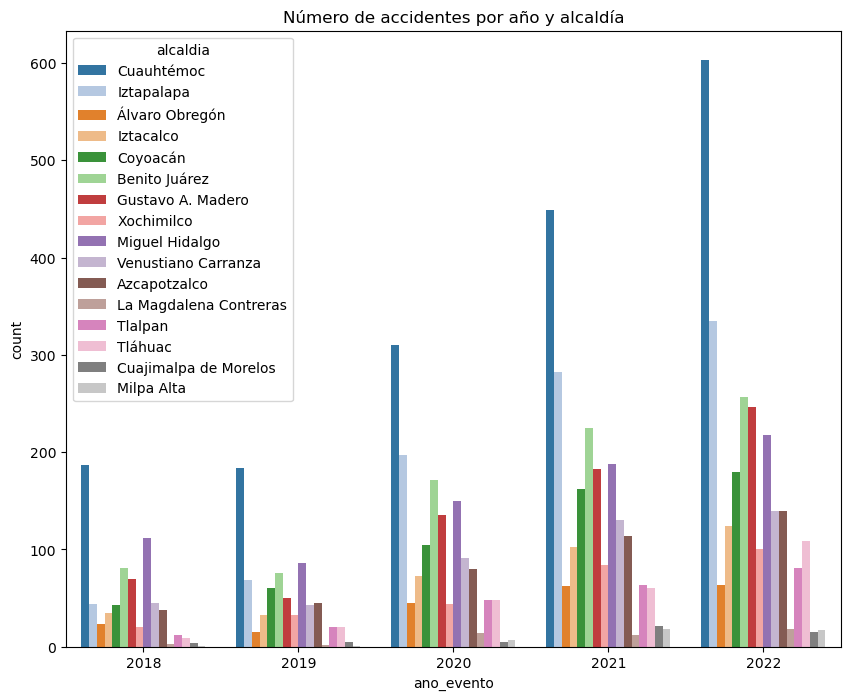

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=acci_bici, x=acci_bici["ano_evento"],hue= acci_bici["alcaldia"], palette="tab20")
plt.title("Número de accidentes por año y alcaldía")
plt.show()


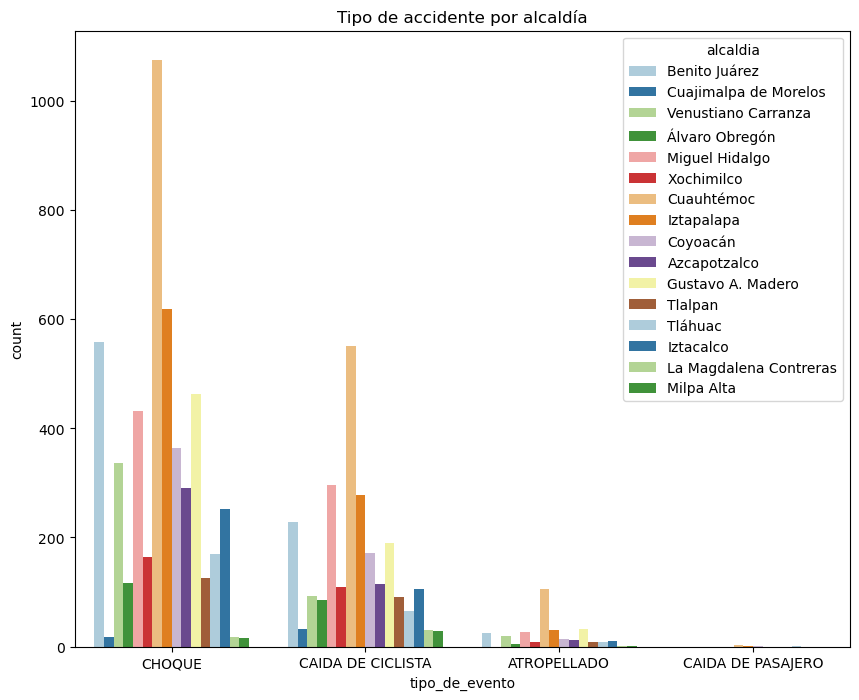

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(data=acci_bici, x=acci_bici["tipo_de_evento"],hue= acci_bici["alcaldia"], palette="Paired")
plt.title("Tipo de accidente por alcaldía")
plt.show()

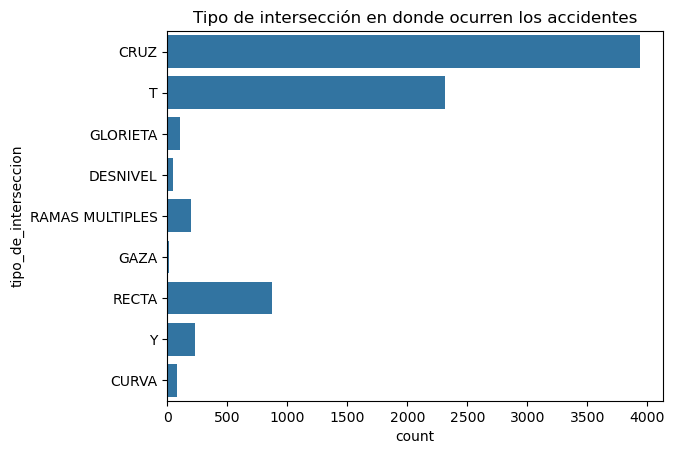

In [28]:

sns.countplot(acci_bici["tipo_de_interseccion"],)
plt.title("Tipo de intersección en donde ocurren los accidentes")
plt.show()

## Análisis de texto en la columna lesiones

In [ ]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords  
print(stopwords.words('spanish'))


In [ ]:
## remplazar algunos numeros que estan en el texto 
acci_bici["lesiones"]=acci_bici["lesiones"].str.replace('\d+', '', regex=True)

In [107]:
textos = ""
for row in acci_bici.lesiones: 
    textos = textos + ' ' + str(row)

In [108]:
stopwords_list = stopwords.words('spanish') + ["izq","simples","der","sup","nan","posible","diversos","descartar"]

In [109]:
textos = ' '.join([x for x in textos.strip().lower().split(' ') if x not in stopwords_list and len(x)>1])

In [111]:
from wordcloud import WordCloud

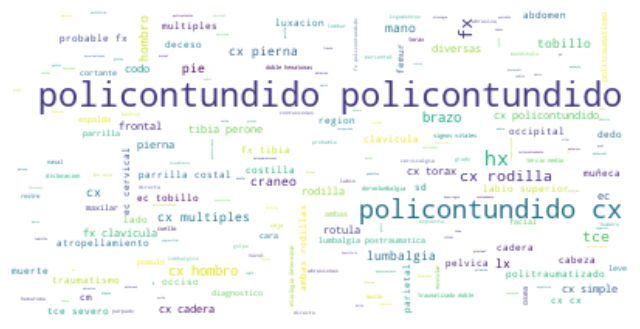

In [148]:
wc = WordCloud(background_color= 'white',max_font_size=100,min_font_size=.1)
wc.generate(textos)
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()